In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [23]:
rows = 150
cols = 150

random_matrix = np.random.randint(256, size=(rows, cols))

p1 = np.zeros((rows, cols))
p2 = np.zeros((rows, cols))

p1[:,:] = random_matrix
p2[:,:] = random_matrix


pattern = np.random.randint(256, size=(rows, cols))
pattern2 = np.random.randint(256, size=(rows, cols))

offset=4
offset2=2

p1[rows//8:rows - rows//8, cols//8:cols - cols//8] = pattern2[rows//8:rows - rows//8, cols//8:cols - cols//8]
p2[rows//8:rows - rows//8, (cols//8)-offset2: cols-(cols//8)-offset2] = pattern2[rows//8:rows - rows//8, cols//8:cols - cols//8]

for i in range(rows):
    for j in range(cols):

        if ((rows//6)**2)<((i-rows//2)**2 + (j-cols//2)**2) <((rows//3)**2):
            p1[i,j] = pattern[i,j]
            if j-offset>=0:
                p2[i,j-offset] = pattern[i,j]

In [24]:
mat1,mat2=p1,p2

In [25]:
N, M = mat1.shape

# Memoization (DP) table for storing the computed MSE values
mse_dp = np.full((N, M, N, M), -1)  # Initialize with -1 to indicate uncomputed values

def calc_mse(mat1, mat2, i, j, a, b):
    # If we've already computed this MSE, return it from DP table
    if mse_dp[i, j, a, b] != -1:
        return mse_dp[i, j, a, b]
    
    # Calculate the MSE for the (i,j) and (a,b) cells
    mse = (mat1[i, j] - mat2[a, b]) ** 2
    for (mx, my) in [(1, -1), (1, 1), (-1, 1), (-1, -1), (0, 1), (1, 0), (0, -1), (-1, 0)]:
        ni, nj = i + mx, j + my
        na, nb = a + mx, b + my
        if 0 <= ni < N and 0 <= nj < M and 0 <= na < N and 0 <= nb < M:
            mse += (mat1[ni, nj] - mat2[na, nb]) ** 2
    
    # Store the result in DP table
    mse_dp[i, j, a, b] = mse
    return mse

# DP array for storing intermediate results of `dd`
dd = np.zeros((N, M))

for i in range(N):
    for j in range(M):
        # Start from the previous k if we are not in the first column
        k = j if j == 0 else int(dd[i, j - 1] + j)
        
        # Continue incrementing k until we find a position where mse is 0 or we reach the end
        while k < M and calc_mse(mat1, mat2, i, k, i, j) != 0:
            k += 1
        
        # If k is within bounds, set the value in dd
        if k < M:
            dd[i, j] = k - j
        else:
            # If no match found, assign a default large value (or leave as 0, if preferred)
            dd[i, j] = 0


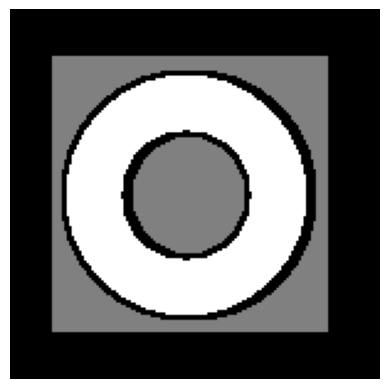

In [26]:
plt.axis('off')
plt.imshow(dd,cmap='gray')